In [1]:
# Importing Libraries 

In [2]:
# imports required 
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [3]:
# reading the dataset 
df = pd.read_csv("/Users/alexahoynacke/Desktop/CWRUBootcamp/Final Project/2011_Updated.csv")

In [4]:
df.iloc[17609,:]

id          17610.0
_STATE          4.0
IYEAR        2011.0
GENHLTH         3.0
PHYSHLTH       88.0
MENTHLTH       88.0
POORHLTH        NaN
HLTHPLN1        1.0
PERSDOC2        1.0
MEDCOST         2.0
CHECKUP1        2.0
BPHIGH4         3.0
TOLDHI2         2.0
CVDINFR4        2.0
CVDCRHD4        2.0
CVDSTRK3        2.0
ASTHMA3         2.0
ASTHNOW         NaN
CHCCOPD         NaN
HAVARTH3        NaN
ADDEPEV2        NaN
CHCKIDNY        NaN
DIABETE3        NaN
SMOKDAY2        NaN
USENOW3         3.0
MARITAL         5.0
EDUCA           5.0
EMPLOY          6.0
INCOME2         5.0
RENTHOM1        NaN
SEX             1.0
EXERANY2        9.0
ALCDAY5       999.0
BPHI2MR         NaN
ADPLEASR        NaN
ADDOWN          NaN
ADSLEEP         NaN
ADENERGY        NaN
ADEAT1          NaN
ADFAIL          NaN
ADTHINK         NaN
ADMOVE          NaN
MISTMNT         NaN
ADANXEV         NaN
SCNTMONY        NaN
SCNTMEAL        NaN
RACE2           1.0
_AGE_G          2.0
HTM4          183.0
WTKG3        7257.0


In [5]:
# EDA

In [6]:
# show dataset 
# The first 5 observation units of the data
df.head()

,id,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,...,ADANXEV,SCNTMONY,SCNTMEAL,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,1,1,2011,4.0,88.0,30,88.0,1,2,2,...,NaN,NaN,NaN,1.0,5,152.0,4309.0,1855.0,85.0,243.0
1,2,1,2011,4.0,12.0,4,4.0,1,1,1,...,NaN,NaN,NaN,1.0,2,175.0,10841.0,3529.0,400.0,231.0
2,3,1,2011,2.0,88.0,3,88.0,1,1,2,...,NaN,NaN,NaN,1.0,5,168.0,4763.0,1695.0,200.0,158.0
3,4,1,2011,3.0,88.0,88,NaN,1,1,2,...,NaN,NaN,NaN,1.0,5,165.0,7031.0,2579.0,NaN,NaN
4,5,1,2011,5.0,25.0,15,25.0,1,1,2,...,NaN,NaN,NaN,2.0,4,155.0,10433.0,4346.0,400.0,186.0


In [7]:
# shape of the data, columns and rows 
df.shape

(506467, 53)

In [8]:
# data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506467 entries, 0 to 506466
Data columns (total 53 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        506467 non-null  int64  
 1   _STATE    506467 non-null  int64  
 2   IYEAR     506467 non-null  int64  
 3   GENHLTH   506464 non-null  float64
 4   PHYSHLTH  506466 non-null  float64
 5   MENTHLTH  506467 non-null  int64  
 6   POORHLTH  264457 non-null  float64
 7   HLTHPLN1  506467 non-null  int64  
 8   PERSDOC2  506467 non-null  int64  
 9   MEDCOST   506467 non-null  int64  
 10  CHECKUP1  506467 non-null  int64  
 11  BPHIGH4   506462 non-null  float64
 12  TOLDHI2   435749 non-null  float64
 13  CVDINFR4  506466 non-null  float64
 14  CVDCRHD4  506467 non-null  int64  
 15  CVDSTRK3  506467 non-null  int64  
 16  ASTHMA3   506467 non-null  int64  
 17  ASTHNOW   65097 non-null   float64
 18  CHCCOPD   505340 non-null  float64
 19  HAVARTH3  505341 non-null  float64
 20  ADDE

In [9]:
# Descriptive statistics of the data
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
id,506467.0,253234.000000,146204.573730,1.0,50647.6,126617.5,253234.0,379850.5,455820.4,481143.7,501402.34,506467.0
_STATE,506467.0,29.730583,15.422281,1.0,8.0,19.0,29.0,42.0,50.0,54.0,72.00,72.0
IYEAR,506467.0,2011.000000,0.000000,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.00,2011.0
GENHLTH,506464.0,2.605449,1.154477,1.0,1.0,2.0,3.0,3.0,4.0,5.0,5.00,9.0
PHYSHLTH,506466.0,60.588085,37.030851,1.0,3.0,15.0,88.0,88.0,88.0,88.0,88.00,99.0
MENTHLTH,506467.0,64.124332,36.006787,1.0,3.0,25.0,88.0,88.0,88.0,88.0,88.00,99.0
POORHLTH,264457.0,56.315155,37.915917,1.0,2.0,14.0,88.0,88.0,88.0,88.0,88.00,99.0
HLTHPLN1,506467.0,1.137417,0.502125,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.00,9.0
PERSDOC2,506467.0,1.390788,0.806087,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.00,9.0
MEDCOST,506467.0,1.887183,0.438760,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.00,9.0


In [10]:
# Check if the data set has any null values 
df.isnull().head(10)

,id,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,...,ADANXEV,SCNTMONY,SCNTMEAL,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,True,True
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,True


In [11]:
# check the number of null values 
df.isnull().sum()

id               0
_STATE           0
IYEAR            0
GENHLTH          3
PHYSHLTH         1
MENTHLTH         0
POORHLTH    242010
HLTHPLN1         0
PERSDOC2         0
MEDCOST          0
CHECKUP1         0
BPHIGH4          5
TOLDHI2      70718
CVDINFR4         1
CVDCRHD4         0
CVDSTRK3         0
ASTHMA3          0
ASTHNOW     441370
CHCCOPD       1127
HAVARTH3      1126
ADDEPEV2      1135
CHCKIDNY      1128
DIABETE3      1126
SMOKDAY2    273607
USENOW3          3
MARITAL        218
EDUCA          349
EMPLOY         443
INCOME2        999
RENTHOM1      2249
SEX              0
EXERANY2     20725
ALCDAY5      27864
BPHI2MR     475406
ADPLEASR    491926
ADDOWN      491937
ADSLEEP     491940
ADENERGY    491942
ADEAT1      491945
ADFAIL      491951
ADTHINK     491954
ADMOVE      491957
MISTMNT     491960
ADANXEV     491964
SCNTMONY    467718
SCNTMEAL    465948
RACE2          126
_AGE_G           0
HTM4          7047
WTKG3        21475
_BMI5        27628
_FRUTSUM     18884
_VEGESUM    

In [12]:
# Data Visualization

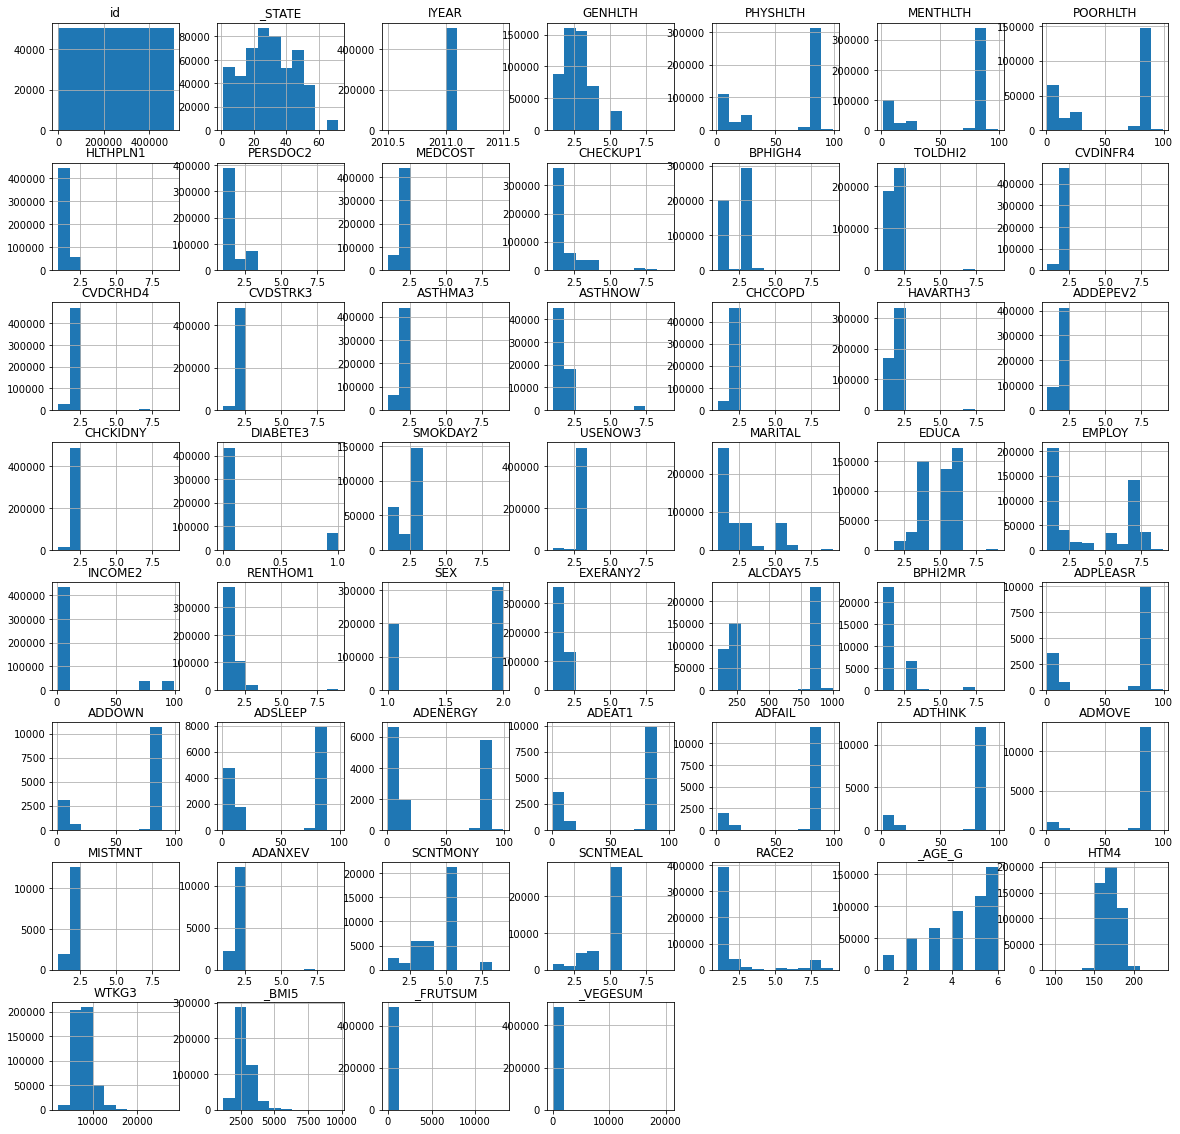

In [13]:
p = df.hist(figsize = (20,20))

<AxesSubplot:xlabel='EXERANY2', ylabel='Density'>

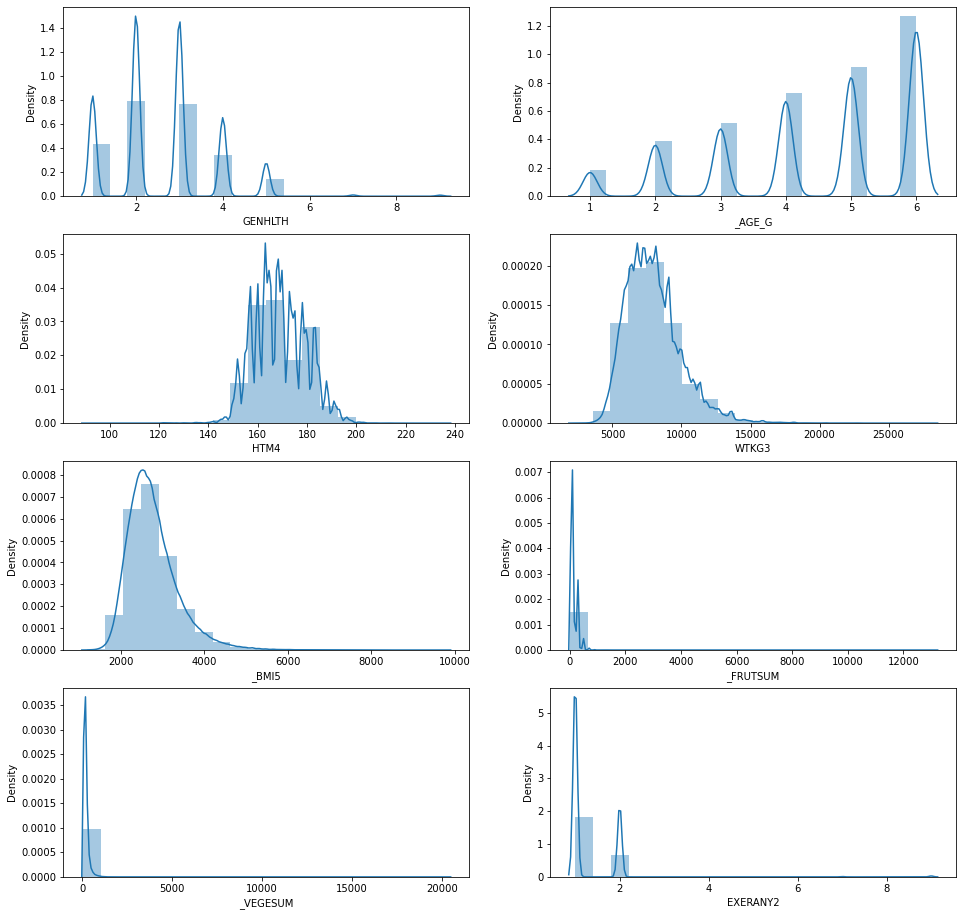

In [14]:
# Histogram and density graphs of variables 
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.GENHLTH, bins = 20, ax=ax[0,0]) 
sns.distplot(df._AGE_G, bins = 20, ax=ax[0,1]) 
sns.distplot(df.HTM4, bins = 20, ax=ax[1,0]) 
sns.distplot(df.WTKG3, bins = 20, ax=ax[1,1]) 
sns.distplot(df._BMI5, bins = 20, ax=ax[2,0])
sns.distplot(df._FRUTSUM, bins = 20, ax=ax[2,1])
sns.distplot(df._VEGESUM, bins = 20, ax=ax[3,0]) 
sns.distplot(df.EXERANY2, bins = 20, ax=ax[3,1]) 


 

In [15]:
# Removing NAN Values 

In [16]:
df['GENHLTH'].fillna(100, inplace = True)
df['PHYSHLTH'].fillna(100, inplace = True)
df['POORHLTH'].fillna(100, inplace = True)
df['BPHIGH4'].fillna(100, inplace = True)
df['TOLDHI2'].fillna(100, inplace = True)
df['CVDINFR4'].fillna(100, inplace = True)
df['ASTHNOW'].fillna(100, inplace = True)
df['CHCCOPD'].fillna(100, inplace = True)
df['HAVARTH3'].fillna(100, inplace = True)
df['ADDEPEV2'].fillna(100, inplace = True)
df['CHCKIDNY'].fillna(100, inplace = True)
df['DIABETE3'].fillna(0, inplace = True)
df['SMOKDAY2'].fillna(100, inplace = True)
df['USENOW3'].fillna(100, inplace = True)
df['MARITAL'].fillna(100, inplace = True)
df['EDUCA'].fillna(100, inplace = True)
df['EMPLOY'].fillna(100, inplace = True)
df['INCOME2'].fillna(100, inplace = True)
df['RENTHOM1'].fillna(100, inplace = True)
df['EXERANY2'].fillna(100, inplace = True)
df['ALCDAY5'].fillna(100, inplace = True)
df['BPHI2MR'].fillna(100, inplace = True)
df['ADPLEASR'].fillna(100, inplace = True)
df['ADDOWN'].fillna(100, inplace = True)
df['ADSLEEP'].fillna(100, inplace = True)
df['ADENERGY'].fillna(100, inplace = True)
df['ADEAT1'].fillna(100, inplace = True)
df['ADFAIL'].fillna(100, inplace = True)
df['ADTHINK'].fillna(100, inplace = True)
df['ADMOVE'].fillna(100, inplace = True)
df['MISTMNT'].fillna(100, inplace = True)
df['ADANXEV'].fillna(100, inplace = True)
df['SCNTMONY'].fillna(100, inplace = True)
df['SCNTMEAL'].fillna(100, inplace = True)
df['RACE2'].fillna(100, inplace = True)
df['HTM4'].fillna(100, inplace = True)
df['WTKG3'].fillna(100, inplace = True)
df['_BMI5'].fillna(100, inplace = True)
df['_FRUTSUM'].fillna(100, inplace = True)
df['_VEGESUM'].fillna(100, inplace = True)

In [17]:
# Plotting the distributions after removing NAN Values 

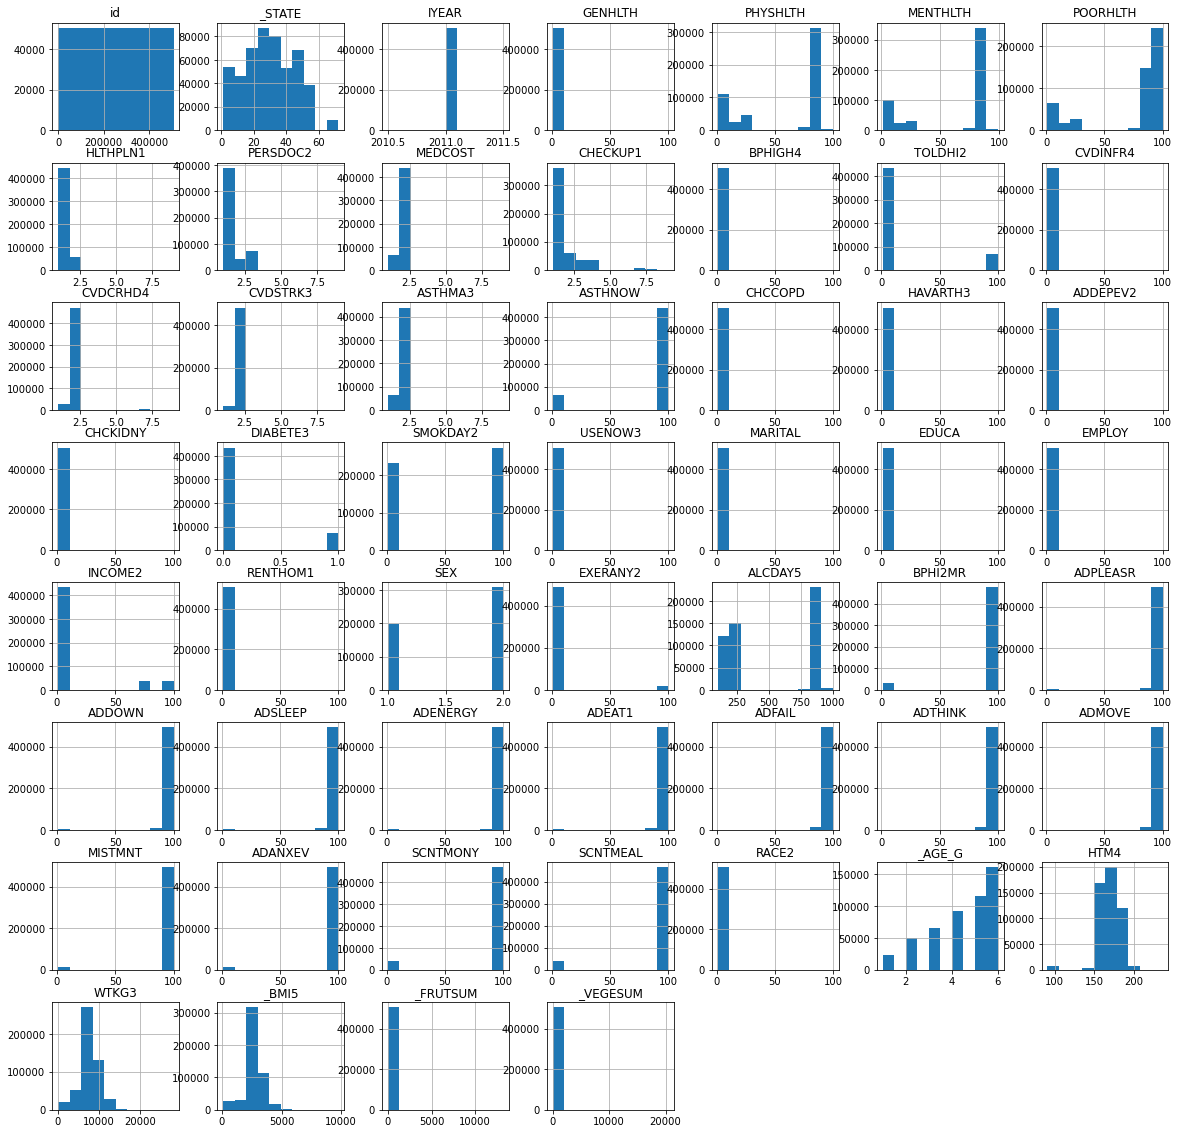

In [18]:
p = df.hist(figsize = (20,20))

In [19]:
# Correlation between all the features 

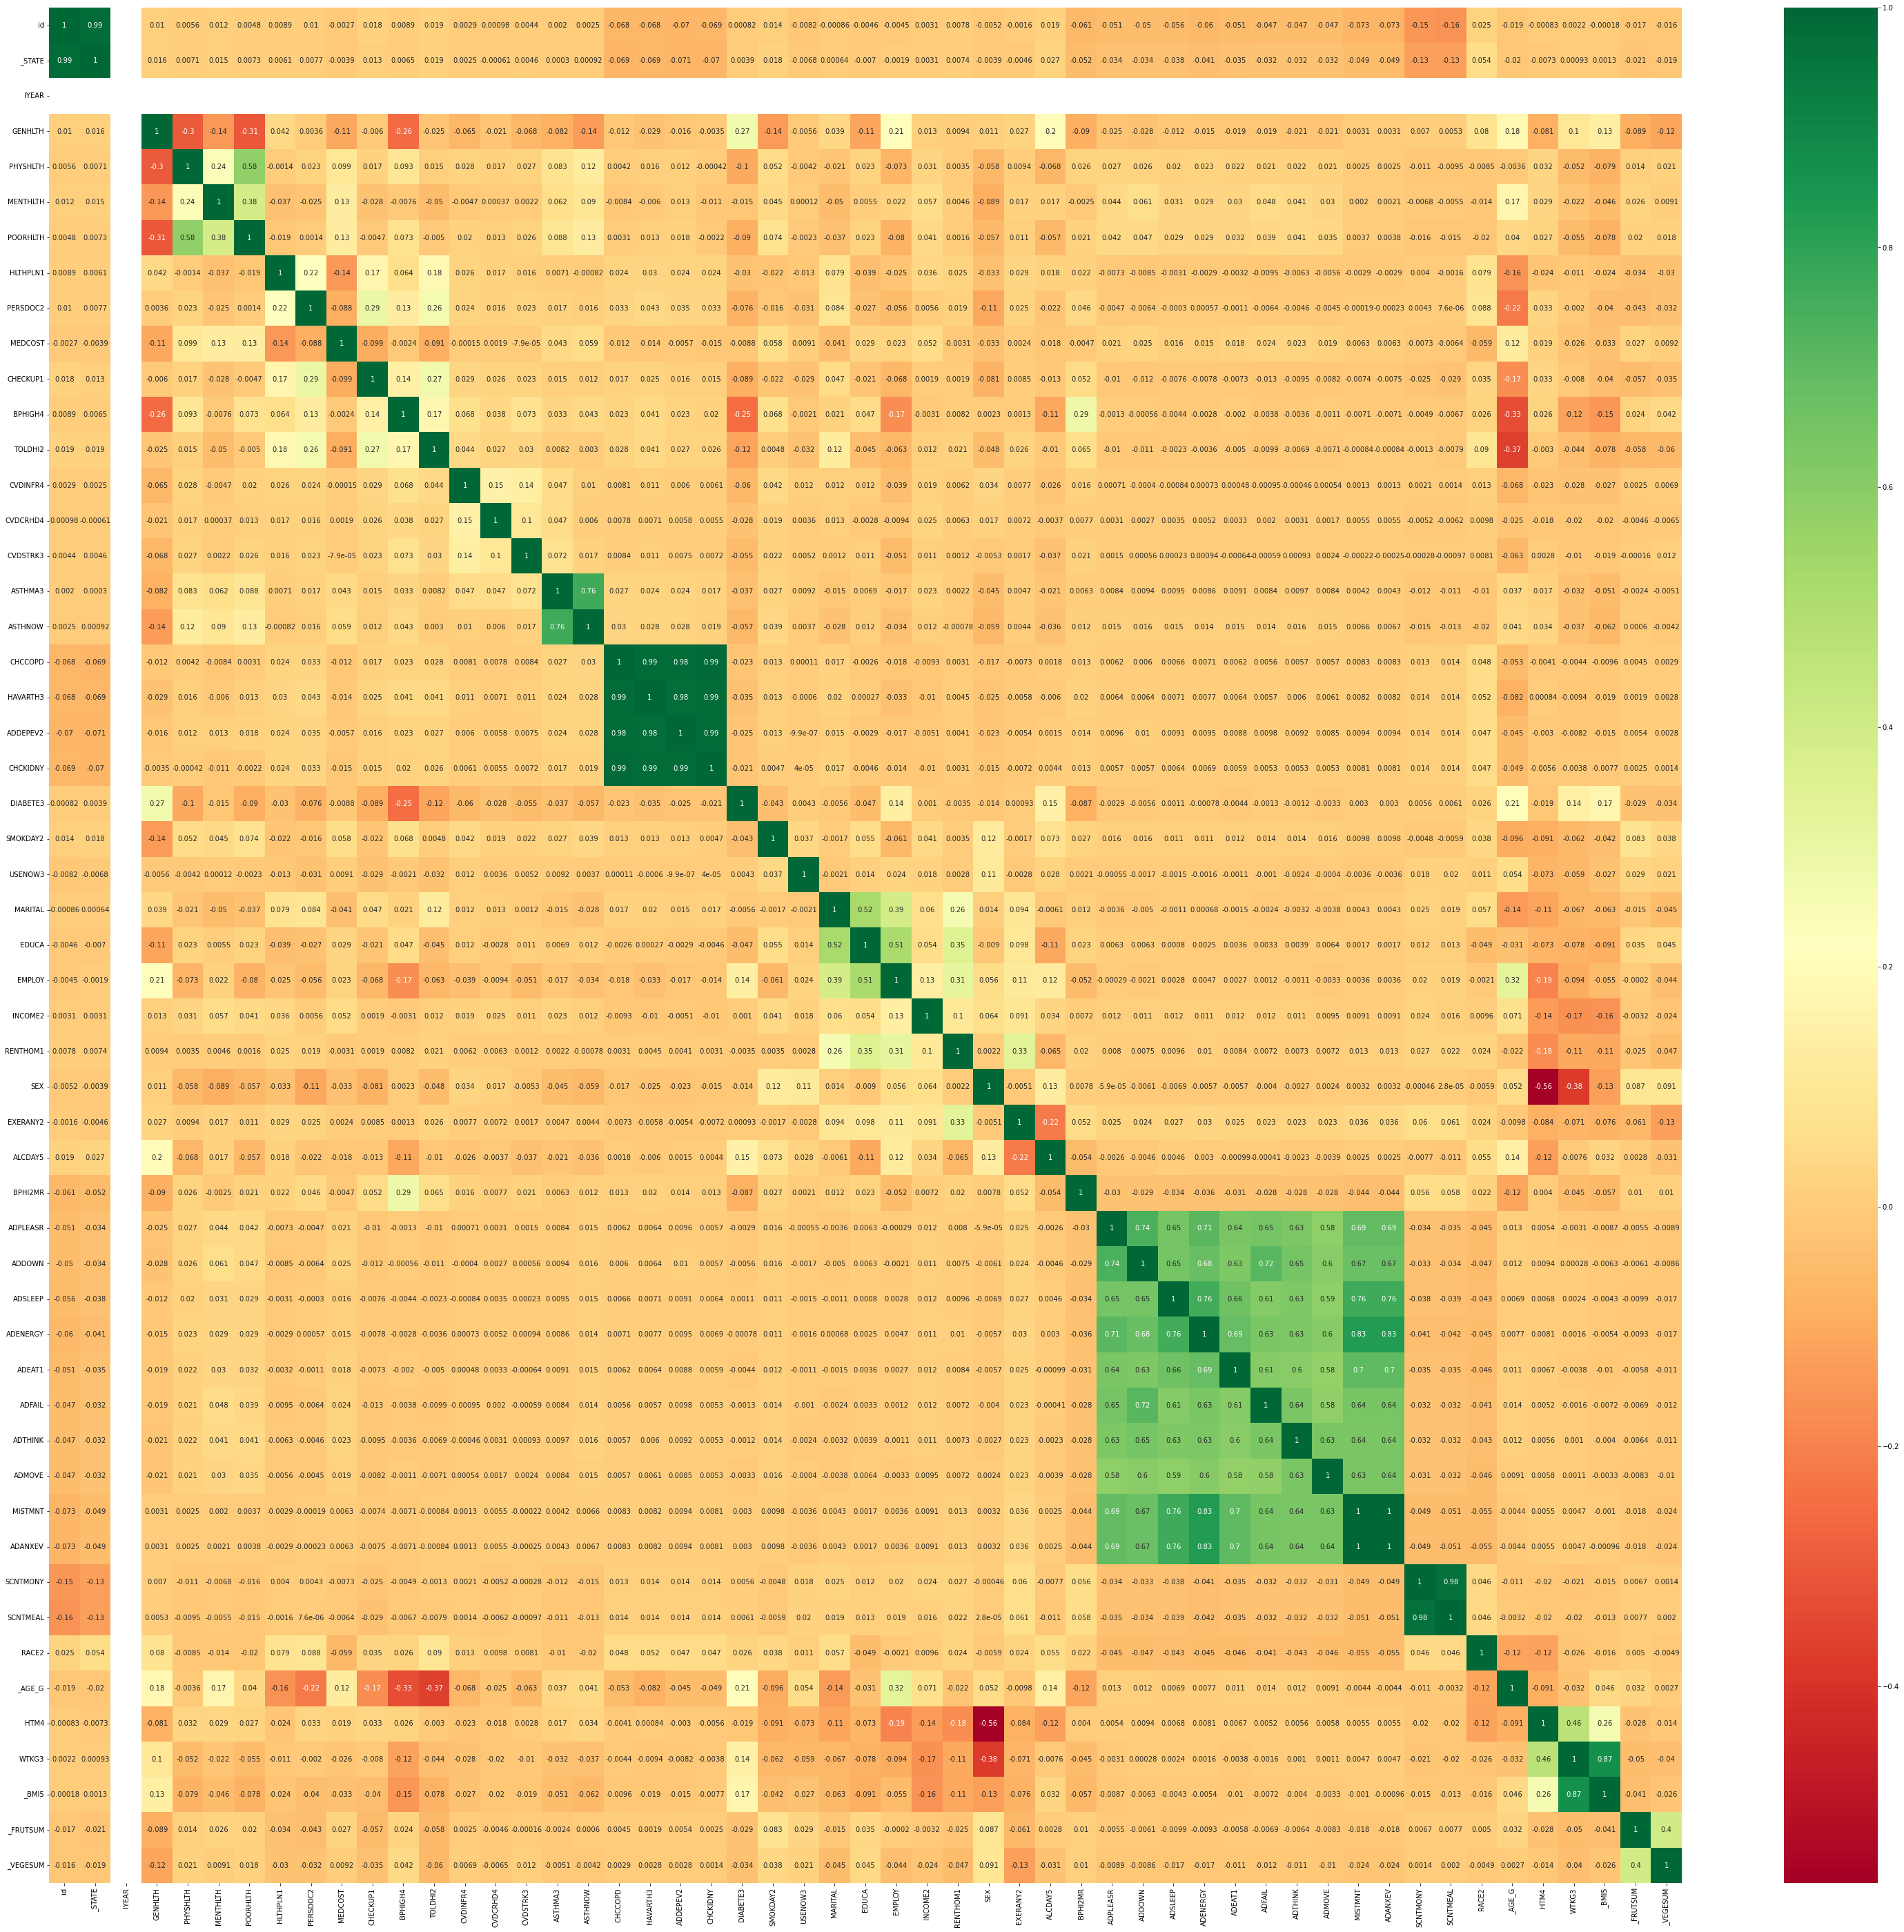

In [20]:
plt.figure(figsize=(53,50))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [21]:
df.head()

,id,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,...,ADANXEV,SCNTMONY,SCNTMEAL,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,1,1,2011,4.0,88.0,30,88.0,1,2,2,...,100.0,100.0,100.0,1.0,5,152.0,4309.0,1855.0,85.0,243.0
1,2,1,2011,4.0,12.0,4,4.0,1,1,1,...,100.0,100.0,100.0,1.0,2,175.0,10841.0,3529.0,400.0,231.0
2,3,1,2011,2.0,88.0,3,88.0,1,1,2,...,100.0,100.0,100.0,1.0,5,168.0,4763.0,1695.0,200.0,158.0
3,4,1,2011,3.0,88.0,88,100.0,1,1,2,...,100.0,100.0,100.0,1.0,5,165.0,7031.0,2579.0,100.0,100.0
4,5,1,2011,5.0,25.0,15,25.0,1,1,2,...,100.0,100.0,100.0,2.0,4,155.0,10433.0,4346.0,400.0,186.0


In [22]:
# Check the Diabetes column - how balanced it is 

In [23]:
df[(df['DIABETE3']<1) & (df['DIABETE3']>0.1)]["DIABETE3"]

Series([], Name: DIABETE3, dtype: float64)

In [24]:
df.iloc[17609, :]

id          17610.0
_STATE          4.0
IYEAR        2011.0
GENHLTH         3.0
PHYSHLTH       88.0
MENTHLTH       88.0
POORHLTH      100.0
HLTHPLN1        1.0
PERSDOC2        1.0
MEDCOST         2.0
CHECKUP1        2.0
BPHIGH4         3.0
TOLDHI2         2.0
CVDINFR4        2.0
CVDCRHD4        2.0
CVDSTRK3        2.0
ASTHMA3         2.0
ASTHNOW       100.0
CHCCOPD       100.0
HAVARTH3      100.0
ADDEPEV2      100.0
CHCKIDNY      100.0
DIABETE3        0.0
SMOKDAY2      100.0
USENOW3         3.0
MARITAL         5.0
EDUCA           5.0
EMPLOY          6.0
INCOME2         5.0
RENTHOM1      100.0
SEX             1.0
EXERANY2        9.0
ALCDAY5       999.0
BPHI2MR       100.0
ADPLEASR      100.0
ADDOWN        100.0
ADSLEEP       100.0
ADENERGY      100.0
ADEAT1        100.0
ADFAIL        100.0
ADTHINK       100.0
ADMOVE        100.0
MISTMNT       100.0
ADANXEV       100.0
SCNTMONY      100.0
SCNTMEAL      100.0
RACE2           1.0
_AGE_G          2.0
HTM4          183.0
WTKG3        7257.0


0.0    435827
1.0     70640
Name: DIABETE3, dtype: int64


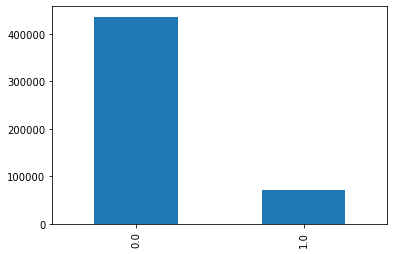

In [25]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["DIABETE3"].map(lambda x: color_wheel.get(x + 1))
print(df.DIABETE3.value_counts())
p=df.DIABETE3.value_counts().plot(kind="bar")

In [26]:
# Scaling the Data 

In [27]:
# Scaled data so that all values are on the same scale 
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["DIABETE3"],axis = 1),), columns=[
'_STATE',
'IYEAR',
'GENHLTH',
'PHYSHLTH',
'MENTHLTH',
'POORHLTH',
'HLTHPLN1',
'PERSDOC2',
'MEDCOST',
'CHECKUP1',
'BPHIGH4',
'TOLDHI2',
'CVDINFR4',
'CVDCRHD4',
'CVDSTRK3',
'ASTHMA3',
'ASTHNOW',
'CHCCOPD',
'HAVARTH3',
'ADDEPEV2',
'CHCKIDNY',
'DIABETE3',
'SMOKDAY2',
'USENOW3',
'MARITAL',
'EDUCA',
'EMPLOY',
'INCOME2',
'RENTHOM1',
'SEX',
'EXERANY2',
'ALCDAY5',
'BPHI2MR',
'ADPLEASR',
'ADDOWN',
'ADSLEEP',
'ADENERGY',
'ADEAT1',
'ADFAIL',
'ADTHINK',
'ADMOVE',
'MISTMNT',
'ADANXEV',
'SCNTMONY',
'SCNTMEAL',
'RACE2',
'_AGE_G',
'HTM4',
'WTKG3',
'_BMI5',
'_FRUTSUM',
'_VEGESUM'])
X.head()

,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,...,ADANXEV,SCNTMONY,SCNTMEAL,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,-1.732047,-1.862929,0.0,1.182782,0.740244,-0.947720,0.308642,-0.27367,0.755765,0.257127,...,0.171694,0.287796,0.29487,-0.362695,0.398315,-1.224070,-1.318299,-0.909260,-0.443972,0.416803
1,-1.732041,-1.862929,0.0,1.182782,-1.312101,-1.669807,-2.089579,-0.27367,-0.484796,-2.022027,...,0.171694,0.287796,0.29487,-0.362695,-1.594142,0.526994,1.290173,1.077483,1.964832,0.330359
2,-1.732034,-1.862929,0.0,-0.514210,0.740244,-1.697580,0.308642,-0.27367,-0.484796,0.257127,...,0.171694,0.287796,0.29487,-0.362695,0.398315,-0.005939,-1.137000,-1.099152,0.435433,-0.195510
3,-1.732027,-1.862929,0.0,0.334286,0.740244,0.663089,0.651245,-0.27367,-0.484796,0.257127,...,0.171694,0.287796,0.29487,-0.362695,0.398315,-0.234338,-0.231303,-0.049999,-0.329267,-0.613324
4,-1.732020,-1.862929,0.0,2.031278,-0.961042,-1.364309,-1.490024,-0.27367,-0.484796,0.257127,...,0.171694,0.287796,0.29487,0.010366,-0.265837,-0.995670,1.127243,2.047119,1.964832,0.006193


In [28]:
# Assess target column - Diabetes 
y = df.DIABETE3
y

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
506462    0.0
506463    0.0
506464    0.0
506465    0.0
506466    0.0
Name: DIABETE3, Length: 506467, dtype: float64

In [29]:
# Model Building 

In [30]:
X = df.drop('DIABETE3', axis=1)
y = df['DIABETE3']

In [31]:
# split into training and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [32]:
# Random Forest 

In [33]:
# Label Encoder so the orginal values are encoded as 0 or 1 
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)



[0 0 0 ... 0 0 0]


In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [36]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8693331737816735


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[141423   2415]
 [ 19424   3873]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    143838
         1.0       0.62      0.17      0.26     23297

    accuracy                           0.87    167135
   macro avg       0.75      0.57      0.60    167135
weighted avg       0.84      0.87      0.84    167135



In [38]:
# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.802195829718491


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[126234  17604]
 [ 15456   7841]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88    143838
         1.0       0.31      0.34      0.32     23297

    accuracy                           0.80    167135
   macro avg       0.60      0.61      0.60    167135
weighted avg       0.81      0.80      0.81    167135



In [58]:
# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

In [ ]:
# Feature Importance 

In [42]:
rfc.feature_importances_

array([0.06453267, 0.04843426, 0.        , 0.05054941, 0.0271193 ,
       0.02206337, 0.02478143, 0.00502162, 0.01074361, 0.00670228,
       0.01316529, 0.03973469, 0.02644211, 0.0108207 , 0.0104134 ,
       0.0063515 , 0.00655885, 0.00794964, 0.00727373, 0.01387539,
       0.00911246, 0.00731928, 0.01819551, 0.00335698, 0.02188232,
       0.02471098, 0.02855286, 0.03610978, 0.01263617, 0.00836513,
       0.01269295, 0.0304197 , 0.0068062 , 0.00129605, 0.00118681,
       0.0014252 , 0.00158126, 0.00140045, 0.00098863, 0.00099585,
       0.00093218, 0.00090069, 0.00089169, 0.00618074, 0.00591144,
       0.0168846 , 0.0279452 , 0.04323425, 0.0645408 , 0.08584322,
       0.05202399, 0.06314338])

(<AxesSubplot:>,)

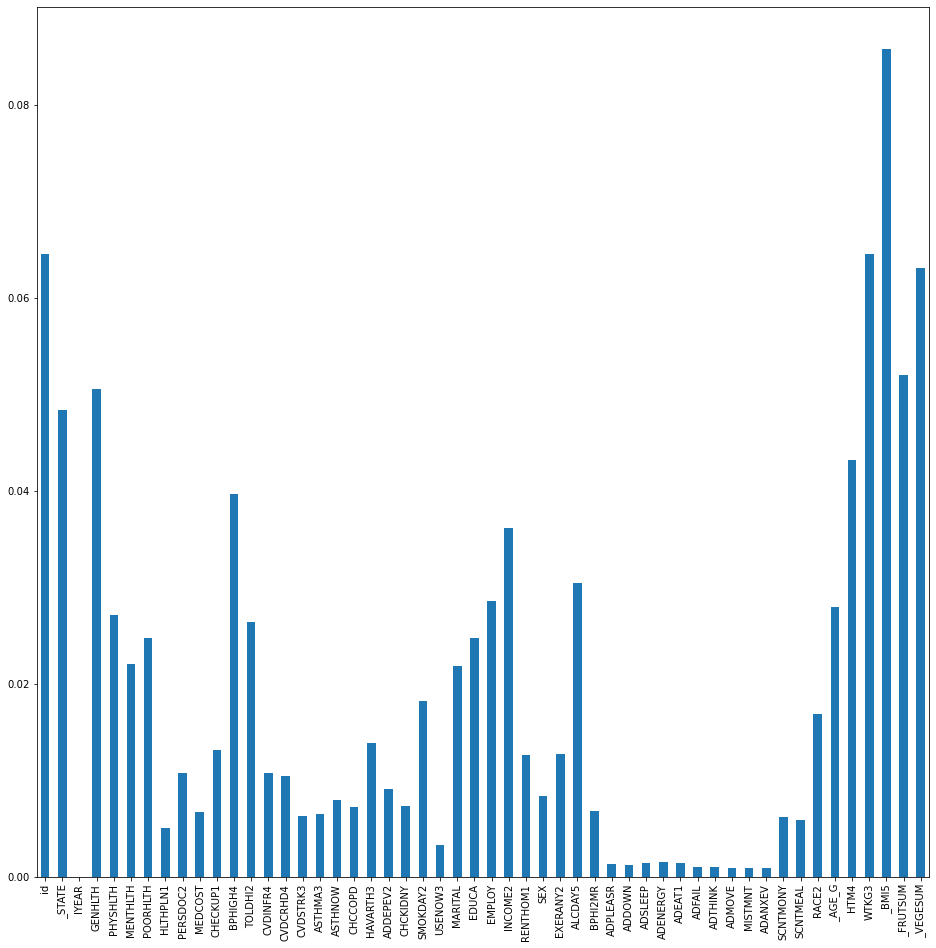

In [57]:
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )